In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder,MinMaxScaler
import pandas as pd
import tensorflow as tf
import os
from tensorflow.keras.callbacks import ModelCheckpoint
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
from keras.utils import plot_model

In [2]:
df = pd.read_excel('SPY500_stock_price_multiple_variables_1_1.xlsx', sheet_name='SPY500_stock_price')

In [3]:
data = df.drop(['Date_Text','Open','High','Low','Adj Close','Volume','Month','Day','Year','Quarter','YM','GDP_Change','Date',],axis=1)

In [4]:
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler


# Split data into features and target variable
X = data[['Date_Num','GDP','DXY','UNRATE','PAYEMS','CPIAUCSL','FEDFUNDS']]
y = data['Close']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Define the neural network model
model = Sequential()
model.add(Dense(18, activation='relu', input_dim=X.shape[1]))
model.add(Dense(18, activation='relu'))
model.add(Dense(18, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')
# model.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])
model.summary()
plot_model(model, to_file='model.png', show_shapes=True)
# Train the model
model.fit(X, y, epochs=100, validation_split=0.1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 18)                144       
                                                                 
 dense_1 (Dense)             (None, 18)                342       
                                                                 
 dense_2 (Dense)             (None, 18)                342       
                                                                 
 dense_3 (Dense)             (None, 1)                 19        
                                                                 
Total params: 847
Trainable params: 847
Non-trainable params: 0
_________________________________________________________________
You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
Epoch 1/100
44/44 [======================

In [5]:
reference_date = dt.datetime(1993, 1, 25)  # Set the reference date to Jan 25, 1993
Date_r = (dt.datetime(2023, 1, 1) - reference_date).days  # Calculate the number of days since the reference date
# Make predictions on new data
new_data = pd.DataFrame({'Date_Num': [Date_r],
                      'GDP': [26746], 
                      'DXY': [104.87], 
                      'UNRATE': [3.4], 
                      'PAYEMS': [154556], 
                      'CPIAUCSL': [6.4], 
                      'FEDFUNDS': [4.57]})
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print(prediction)


1/1 [==============================] - 0s 56ms/step
[[352.1775]]


In [6]:
reference_date = dt.datetime(1993, 1, 25)  # Set the reference date to Jan 25, 1993
Date_r = (dt.datetime(2022, 4, 4) - reference_date).days  # Calculate the number of days since the reference date
# Make predictions on new data
new_data = pd.DataFrame({'Date_Num': [Date_r],
                      'GDP': [25248], 
                      'DXY': [98.63], 
                      'UNRATE': [3.6], 
                      'PAYEMS': [151678], 
                      'CPIAUCSL': [8.23], 
                      'FEDFUNDS': [0.33]})
new_data_scaled = scaler.transform(new_data)
prediction = model.predict(new_data_scaled)
print(prediction)

1/1 [==============================] - 0s 20ms/step
[[372.0582]]


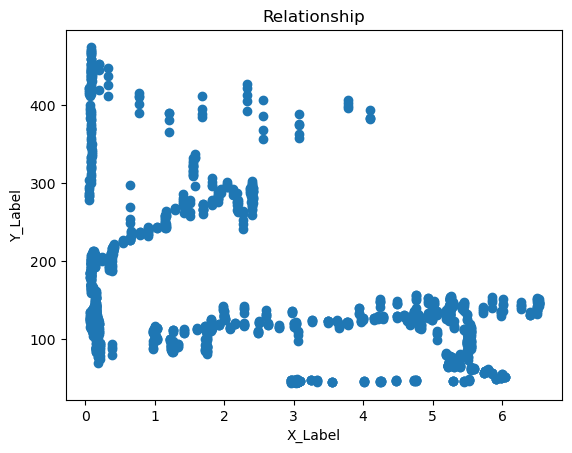

In [8]:
# Create scatter chart
plt.scatter(data['FEDFUNDS'], data['Close'])
plt.xlabel('X_Label')
plt.ylabel('Y_Label')
plt.title('Relationship')
plt.show()

In [9]:
pip install graphviz

     ---------------------------------------- 47.0/47.0 kB 1.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
